In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sliding_puzzles
import matplotlib.pyplot as plt
import torch
import augmentations as aug

In [3]:
def plott(obs, save_name=None):
    plt.imshow(obs)
    plt.axis('off')  # Remove ticks and axes
    if save_name:
        plt.savefig(f"plots/{save_name}.png", bbox_inches='tight', pad_inches=0)  # Remove padding
    plt.show()

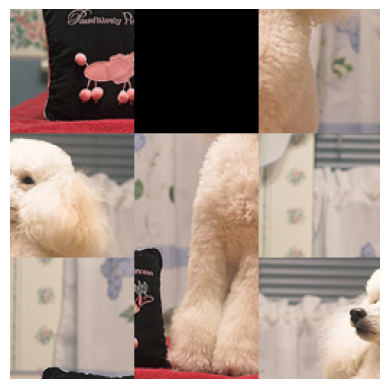

In [5]:
env = sliding_puzzles.make(
    w=3,
    variation="image", 
    image_folder="demo", 
    image_pool_size=1, 
    image_pool_seed=7,
    image_size=256
)
obs, info = env.reset()
plott(obs)

In [58]:
def augment(x, fn, return_tensor=False, **kwargs):
    aobs = torch.tensor(x).permute(2, 0, 1).unsqueeze(0)
    aobs = aobs.float() / 255.0
    aobs = fn(aobs, **kwargs).squeeze().permute(1, 2, 0)
    aobs = aobs.clip(0, 1).mul(255).byte().numpy()
    plott(aobs) # , f"{fn.__name__}"
    return aobs if return_tensor else None

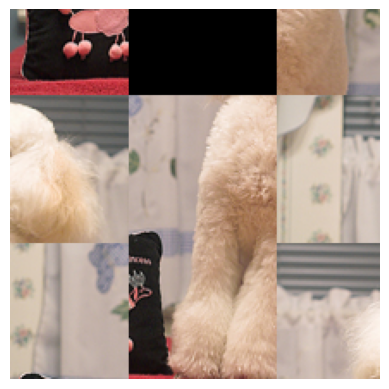

In [13]:
augment(obs, aug.crop, size=215)

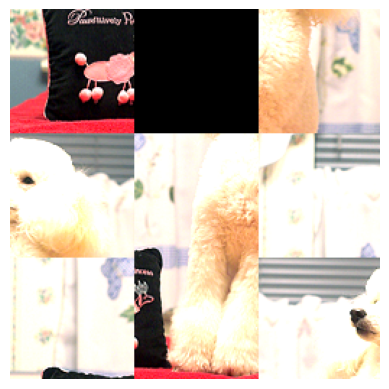

In [20]:
augment(obs, aug.color_jitter)

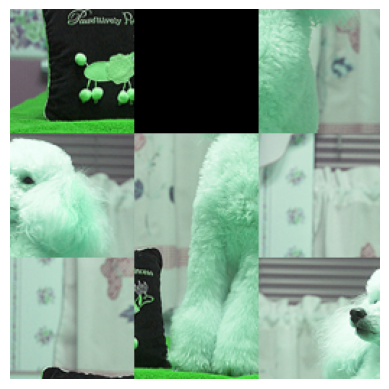

In [21]:
augment(obs, aug.channel_shuffle)

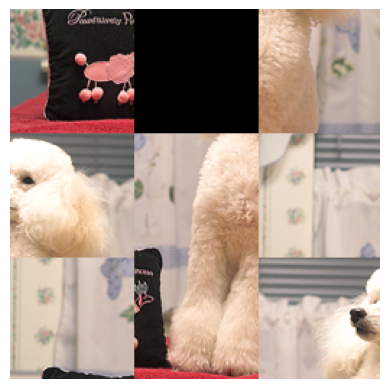

In [27]:
augment(obs, aug.brightness, max_scale=0.5)

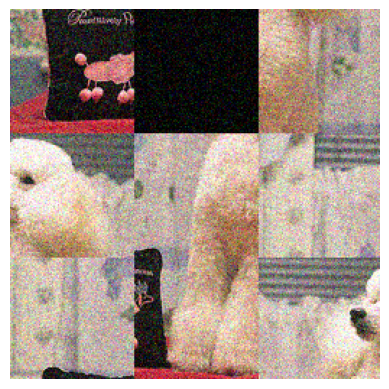

In [33]:
augment(obs, aug.gaussian_noise, max_scale=0.1)

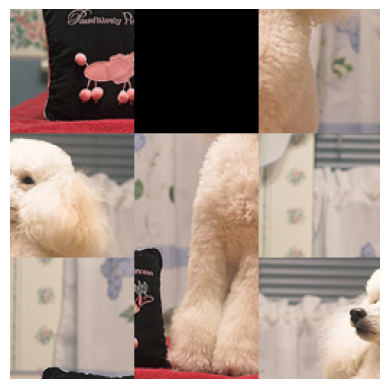

In [48]:
augment(obs, aug.blur)

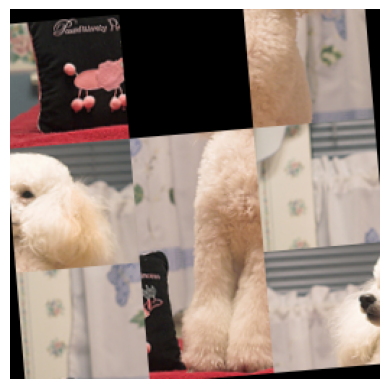

In [54]:
augment(obs, aug.rotation)

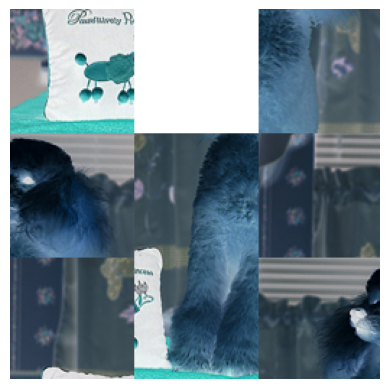

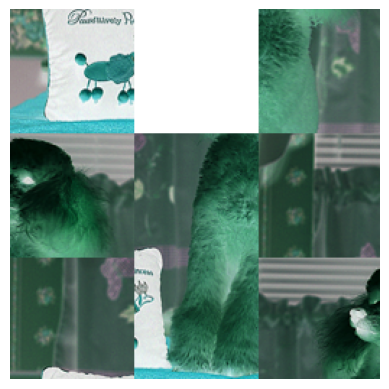

In [73]:
augment(augment(obs, aug.inversion, return_tensor=True), aug.channel_shuffle)

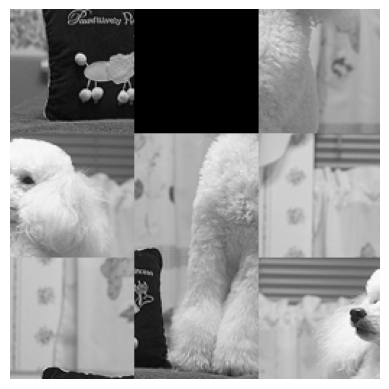

In [86]:
augment(obs, aug.grayscale)

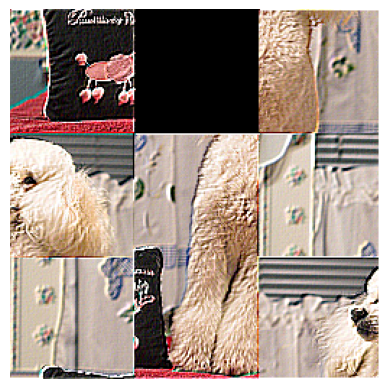

In [89]:
augment(obs, aug.convolution)

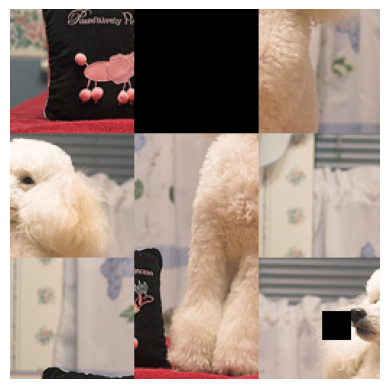

In [93]:
augment(obs, aug.cutout)

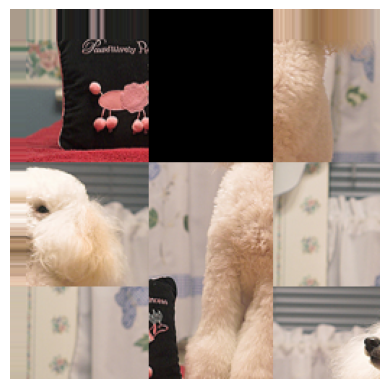

In [112]:
augment(obs, aug.shift, pad=20)